#Correlação e regressão
#Dataset do projeto https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo
Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [63]:
df = pd.read_csv('dados_projeto.csv', sep=';')

In [64]:
df

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
...,...,...
360,32307,24.00
361,26095,22.64
362,22309,21.68
363,20467,21.38


In [67]:
df['X']

0      27.30
1      27.02
2      24.82
3      23.98
4      23.82
       ...  
360    24.00
361    22.64
362    21.68
363    21.38
364    24.76
Name: X, Length: 365, dtype: float64

<AxesSubplot:title={'center':'Box plot'}, xlabel='Consumo de Cerveja (Litros'>

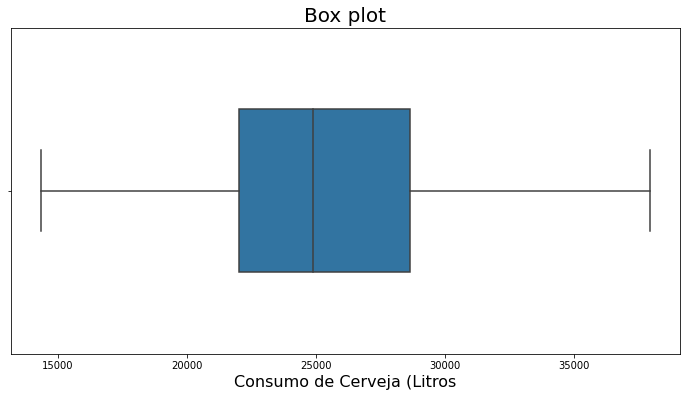

In [85]:
# Visualizando o consumo de litros
ax = sns.boxplot(data=df, x='Y' ,orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (Litros', fontsize=16)
ax

<AxesSubplot:title={'center':'Box plot'}, xlabel='Temperatura média'>

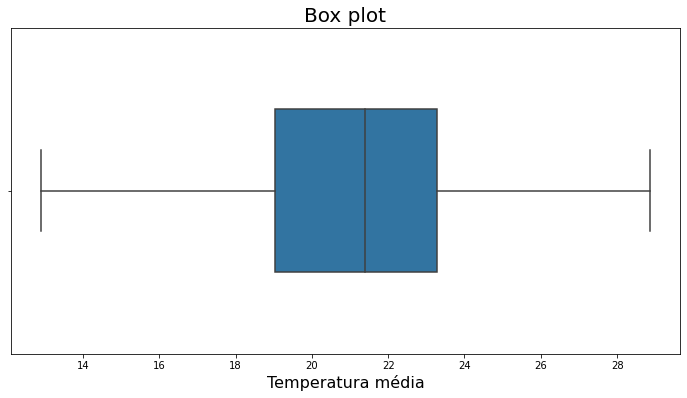

In [87]:
#Visualizando a temperatura média
ax = sns.boxplot(data=df, x='X' ,orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Temperatura média', fontsize=16)
ax

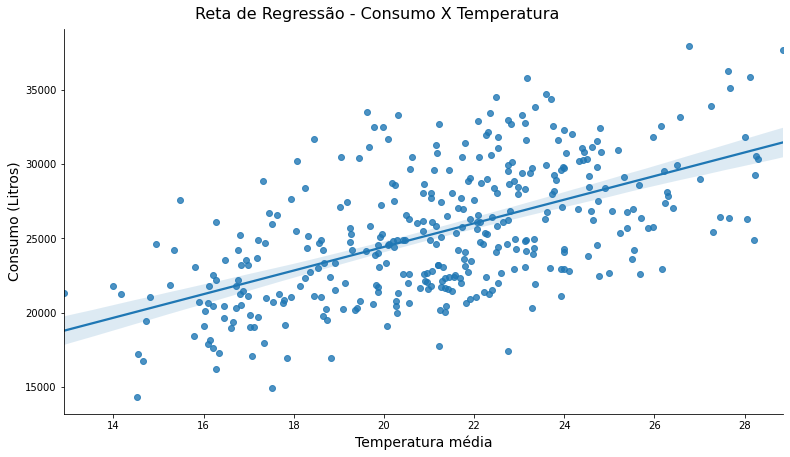

In [88]:
ax = sns.lmplot(x="X", y="Y", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média", fontsize=14)
ax.set_ylabels("Consumo (Litros)", fontsize=14)
ax

In [71]:
df.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


In [73]:
Y = df.Y
X = sm.add_constant(df.X)

In [74]:
X.head()

,const,X
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82


In [75]:
Y.head()

0    25461
1    28972
2    30814
3    29799
4    28900
Name: Y, dtype: int64

In [76]:
resultado_regressao = sm.OLS(Y, X).fit()

In [77]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.87e-33
Time:                        10:51:51   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

In [78]:
df['Y_previsto'] = resultado_regressao.predict()
df

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315
...,...,...,...
360,32307,24.00,27606.088172
361,26095,22.64,26525.047922
362,22309,21.68,25761.960686
363,20467,21.38,25523.495925


In [82]:
# Dia em que a temperatua for 42 °C
resultado_regressao.predict([1, 42])[0]
# Ou seja, em uma dia de 42°C o consumo de cerveja é 41.913 litros

41913.97383816629

In [80]:
#Resíduos da regressão
df['residuos']=resultado_regressao.resid
df.head()

,Y,X,Y_previsto,residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


In [83]:
#Obtendo r²
resultado_regressao.rsquared

0.33018204933243234